## California Housing Dataset$^{[1]}$

We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 characteristics.

+ `latitude`: A measure of how far north a house is; a higher value is farther north
+ `longitude`: A measure of how far west a house is; a higher value is farther west
+ `housing_median_age`: Median age of a house within a block; a lower number is a newer building
+ `total_rooms`: Total number of rooms within a block
+ `total_bedrooms`: Total number of bedrooms within a block
+ `population`: Total number of people residing within a block
+ `households`: Total number of households, a group of people residing within a home unit, for a block
+ `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
+ `median_house_value`: Median house value for households within a block (measured in US Dollars)

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("data/housing.csv")

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Difference between mean and median? when to use mean? when to use median?**

When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean.  When a data set has outliers, variability is often summarized by a statistic called the interquartile range, which is the difference between the first and third quartiles. The first quartile, denoted Q1, is the value in the data set that holds 25% of the values below it. The third quartile, denoted Q3, is the value in the data set that holds 25% of the values above it.

When there are no outliers in a sample, the mean and standard deviation are used to summarize a typical value and the variability in the sample, respectively.  When there are outliers in a sample, the median and interquartile range are used to summarize a typical value and the variability in the sample, respectively. 

In [26]:
df["total_rooms"].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [27]:
df["total_rooms"].mean()

2635.7630813953488

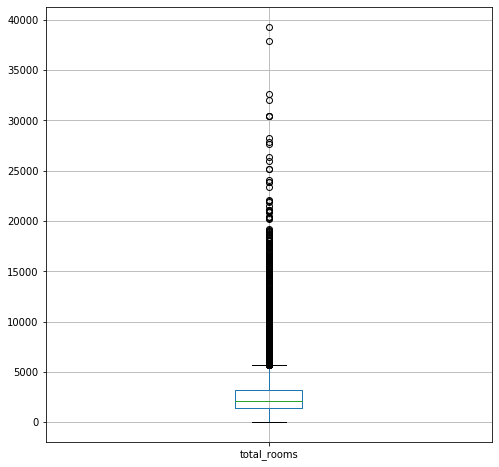

In [28]:
df.boxplot(column=["total_rooms"], figsize=(8, 8))

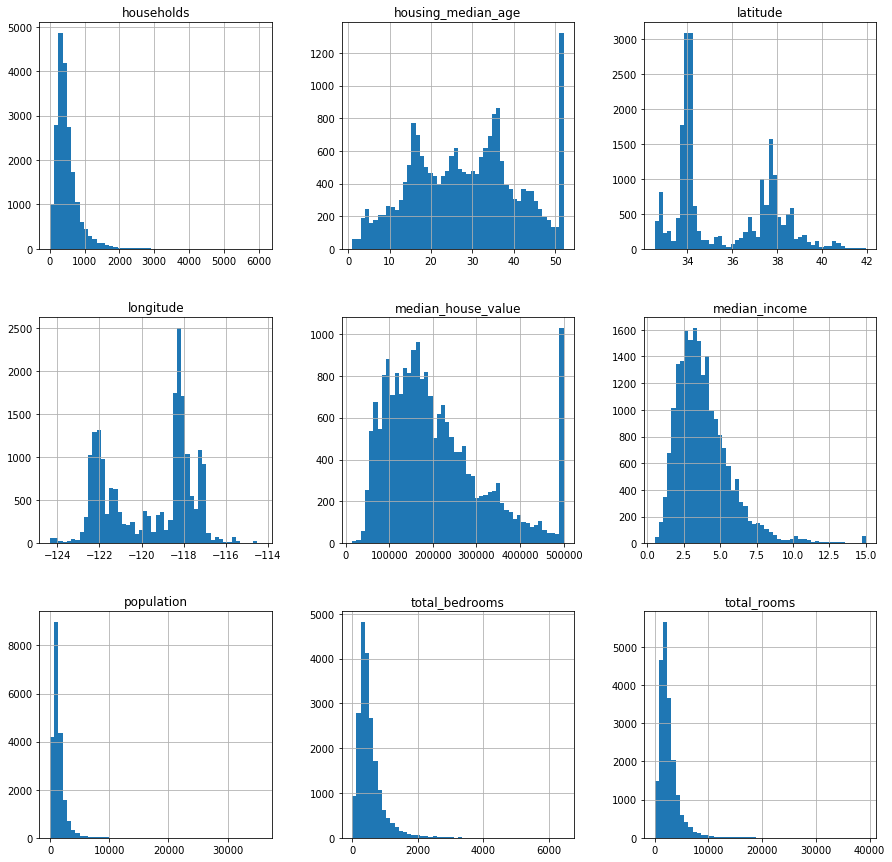

In [8]:
df.hist(bins=50, figsize=(15, 15));

In [9]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

`<1H OCEAN`: 1 hour away from the ocean.

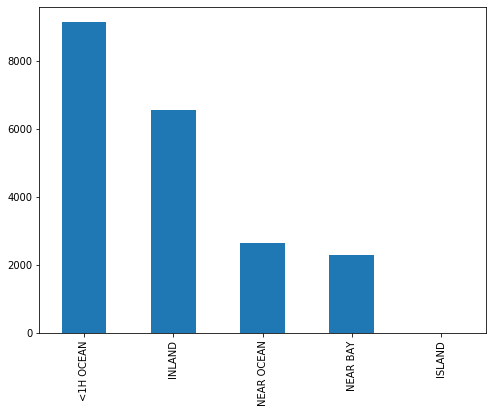

In [10]:
df["ocean_proximity"].value_counts().plot(kind="bar", figsize=(8, 6))

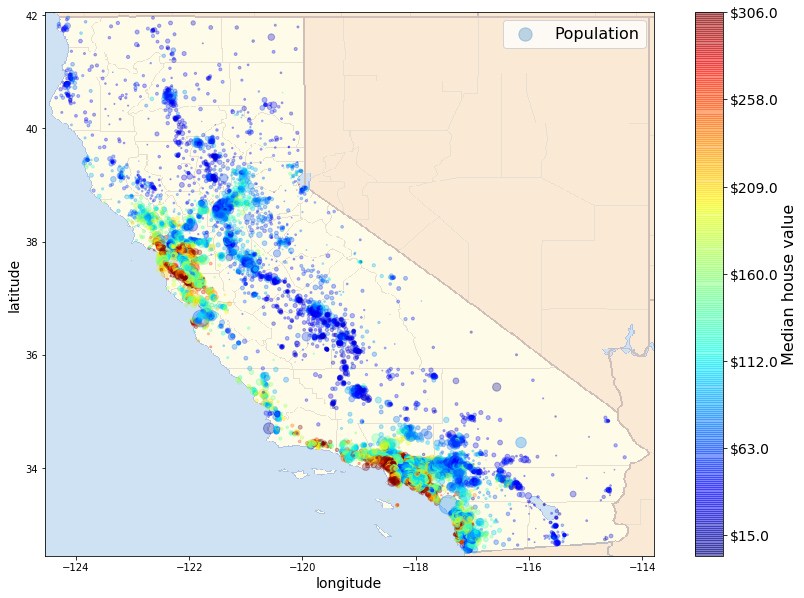

In [11]:
california_img = mpimg.imread("images/california.png")
ax = df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.3,
    s=df["population"]/100,
    label="Population",
    figsize=(15, 10),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
)

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
ax.set_xlabel("longitude", fontsize=14)
ax.set_ylabel("latitude", fontsize=14)
prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels([f"${round(v/1000)}" for v in tick_values], fontsize=14)
cbar.set_label("Median house value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Correlation

$$r_{xy} = \dfrac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^{2}\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

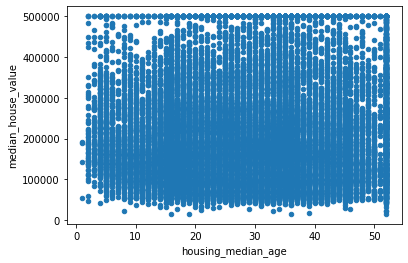

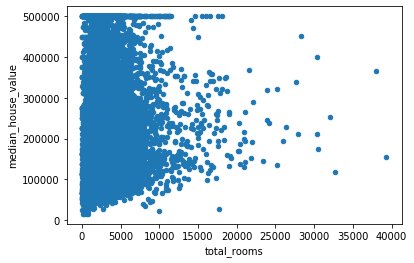

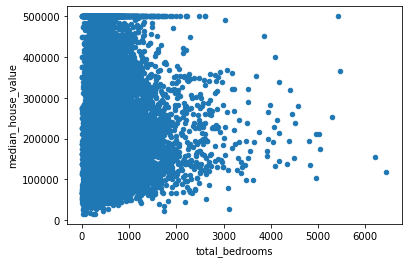

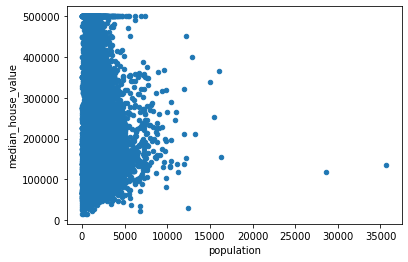

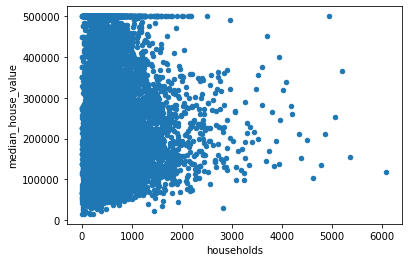

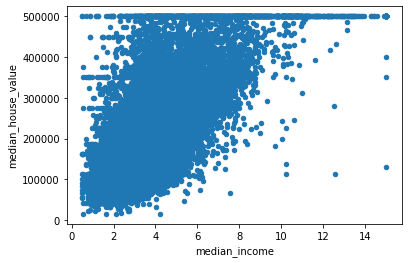

In [16]:
y = "median_house_value"

for x in ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]:
    df.plot.scatter(x=x, y=y)

In [20]:
df.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [23]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]

In [24]:
df.corr()["median_house_value"]

longitude             -0.045967
latitude              -0.144160
housing_median_age     0.105623
total_rooms            0.134153
total_bedrooms         0.049686
population            -0.024650
households             0.065843
median_income          0.688075
median_house_value     1.000000
rooms_per_household    0.151948
Name: median_house_value, dtype: float64

## Fill NA

In [30]:
df["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [32]:
df["total_bedrooms"].mean(), df["total_bedrooms"].median()

(537.8705525375618, 435.0)

In [34]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(value=df["total_bedrooms"].median())

In [35]:
df["total_bedrooms"].describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [36]:
df["total_bedrooms"].median()

435.0

## References:
1. Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.